In [25]:
import os
import cv2
import numpy as np
import utils as u
import matplotlib.pyplot as plt 

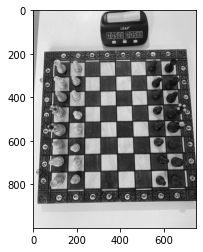

In [26]:
game_images_path = '.././photos_test/guilhem_board/'
move_image_list = sorted(os.listdir(game_images_path))
move_nb = len(move_image_list)

# List d'images représentant les différents boards
move_image_list = [cv2.imread('.././photos_test/guilhem_board/' + move,0) for move in move_image_list] 

plt.imshow(move_image_list[0], cmap = 'gray')
plt.show()


In [27]:
#### Partie Guilhem  #####

def get_boxes_from_image(board_img):  # A modifier
    boxes_test = u.get_test_boxes()
    boxes = boxes_test
    return boxes

###### Fin partie Guilhem

list_coord_boxes = [ get_boxes_from_image(board_img) for board_img in move_image_list] # liste de liste de coordonnées de box
print(len(list_coord_boxes[0]))

64


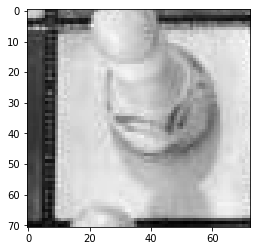

In [28]:
#liste de dimensions move_nb x 64, images des 64 cases pour chaque mouvement
list_square_img = [u.get_all_squares(list_coord_boxes[i], move_image_list[i]) for i in range(move_nb)]
plt.imshow(list_square_img[1][1], cmap='gray')
plt.show()

In [29]:
# List de array représentant chaque position
list_array_move = [u.squares_to_array(list_square) for list_square in list_square_img]
list_array_move[1]

array([[2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [30]:
board = u.get_initial_position()
supposed_first_move = np.array([[2]*8, 
                       [2]*8, 
                       [0]*8, 
                       [0]*8,
                       [0]*3 + [1] + [0]*4,
                       [0]*8,
                       [1]*3 + [0] + [1]*4,
                       [1]*8 ])

In [31]:
# Affiche une nouvelle posiiton
u.new_position(board, supposed_first_move)

e4


array([['R', 'N', 'B', 'K', 'Q', 'B', 'N', 'R'],
       ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
       [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', 'p', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
       ['p', 'p', 'p', ' ', 'p', 'p', 'p', 'p'],
       ['r', 'n', 'b', 'k', 'q', 'b', 'n', 'r']], dtype='<U1')